━━━━━━━━━━━━━━━━━━━━━━━━━━━━
§ Lec 01 기본적 머신러닝 용어와 개념 설명

 ㅇ머신러닝: 데이터 기반으로 학습하여 컴퓨터가 프로그래밍
 ㅇ머신러닝의 종류: 학습 방식에 따라 레이블링된 데이터 기반의 지도학습(supervised learning),  un-labeled data 기반 비지도 학습
 ㅇ지도학습의 종류: classification(분류), regression(추정)


In [ ]:
#코딩 없음

━━━━━━━━━━━━━━━━━━━━━━━━━━━━


§Lec 02 Simple Linear Regression

 ㅇ 리그레션 개념: 후퇴, 되돌아 간다 -> ‘regression toward the mean’
 ㅇLinear Regression 선형회귀: 데이터를 가장 잘 대변하는 직선의 방정식을 찾는 것
   특히 기울기와 y절편 찾는 것 
   가설 H(x) = W*x + b
 ㅇ 비용 cost : H(x) - y    : 가설과 실제y값 차이
     -> 오차가 음수 일수도 있으므로 제곱의 평균을 구하고, 
     -> Cost function을 최소화 -> 데이터를 가장 잘 대변하는 직선의 방정식 찾기
     
    𝑐𝑜𝑠𝑡(𝑊)=1/𝑚*∑𝑖=1𝑚(𝑊𝑥𝑖−𝑦𝑖)2    
    *cost function = loss function


In [2]:
#텐서플로, 넘파이 임포트
import tensorflow as tf
import numpy as np

# ??? Eager execution(즉시 실행) -> 그래프 생성 없이 연산을 즉시 실행하는 명령형 프로그래밍 환경??? 
tf.enable_eager_execution()

In [3]:
#데이터 list 형태로 입력
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

(0, 8)

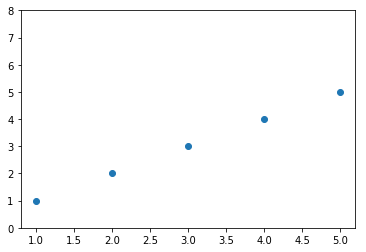

In [7]:
#맷플롯립 임포트하고 x,y 그래프 생성, y범위는 0~8로 지정
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'o')
plt.ylim(0,8)

#여기까지 데이터 입력하고 확인함

In [8]:
# ??? 리듀스_민 함수로 무슨짓 함
# 제거할 차원을 인풋으로 넣고, 차원을 제거하고 전체의 평균 구함
# ??? v에 입력한 값은 뭔지, 2.5 주석 처리한거 무슨 의미?

v = [1., 2., 3., 4.]
tf.reduce_mean(v) #2.5

<tf.Tensor: id=6, shape=(), dtype=float32, numpy=2.5>

In [11]:
# ??? tf.square 로 제곱하는데 왜하는지?
tf.square(3)

<tf.Tensor: id=32, shape=(), dtype=int32, numpy=9>

In [10]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

#tf.Variable 는 텐서를 메모리에 저장하는 변수. 즉 모델 파라미터를 저장할 변수 지정함
#Variable 들은 초기화 필요함
#가중치 W와 b 초기화

W = tf.Variable(2.0)
b = tf.Variable(0.5)

#hypothesis 설정
hypothesis = W * x_data + b

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
# ??? 뭔가 함
W.numpy(), b.numpy()

(2.0, 0.5)

In [12]:
#??? 뭔가 확인하는듯
hypothesis.numpy()

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

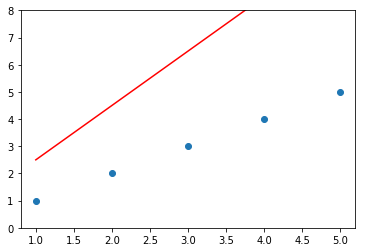

In [15]:
#초기값으로 모델 확인
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0,8)
plt.show()

In [16]:
#코스트 펑션 정의
#코스트 = 가설값-실제값의 제곱의 평균
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [17]:
#그래디언트 테입에 변수를 기록하고 w와 b 업데이트 
with tf.GradientTape() as tape:
    hypothesis = W *x_data+ b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost, [W,b])
W_grad.numpy(), b_grad.numpy()


(25.0, 7.0)

In [18]:
#파라미터 업데이트
learning_rate = 0.01
W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

(1.75, 0.43)

(0, 8)

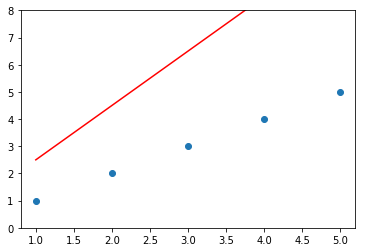

In [22]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059


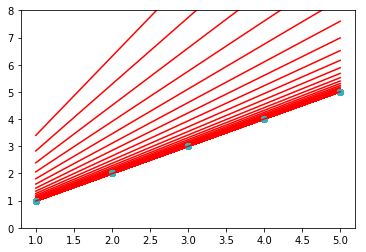

In [24]:
#여러번 반복
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
        W_grad, b_grad = tape.gradient(cost, [W, b])
        W.assign_sub(learning_rate * W_grad)
        b.assign_sub(learning_rate * b_grad)
        if i % 10 ==0:
            print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))
    # ??? 뭘 프린트하는지 잘 이해 안감 
    
    plt.plot(x_data, y_data, 'o')
    plt.plot(x_data, hypothesis.numpy(), 'r-')
    plt.ylim(0,8)

In [25]:
#모델을 만들었으니 이제 예측
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)


━━━━━━━━━━━━━━━━━━━━━━━━━━━━


§ Lec 03 Simple Linear Regression and how to minimize cost
 ㅇ Hypothesis 가설 모델 : H(x) = W*x + b   -> 학습: cost function 최소화

 ㅇ W(가중치 또는 기울기)에 따라 Cost function 변화 
     -> Cost function 최소화 하는 W 찾기 -> 학습
 
 ㅇ Gradient descent algorithm
    Cost function 최저점 찾기 위한 알고리즘
    W 랜덤(초기값) 부여 -> 업데이트
    이를 위해 그래디언트 디센트 알고리즘에서는 코스트펑션 W편미분값을 러닝레이트와 곱한 값을 기존값에서 빼면서 W 업데이트
    *그래디언트 디센트 사용시 컨벡스 펑션(로컬미니멈 = 글로벌 미니멈) 아닌 경우 코스트펑션의 미니멈값 찾는데에 한계 발생함
    


In [26]:
import tensorflow as tf
import numpy as np

tf.enable_eager_execution()
tf.__version__


'1.13.1'

In [27]:
X = np.array([1,2,3])
Y = np.array([1,2,3])

def cost_func(W, X, Y):
    c = 0
    for i in range(len(X)):
        c += (W * X[i] - Y[i]) ** 2
    return c / len(X)

for feed_W in np.linspace(-3, 5, num=15):
    curr_cost = cost_func(feed_W, X, Y)
    print("{:6.3f}|{:10.5f}".format(feed_W, curr_cost))
    #??? 프린트 하는 규칙 뭥미?



-3.000|  74.66667
-2.429|  54.85714
-1.857|  38.09524
-1.286|  24.38095
-0.714|  13.71429
-0.143|   6.09524
 0.429|   1.52381
 1.000|   0.00000
 1.571|   1.52381
 2.143|   6.09524
 2.714|  13.71429
 3.286|  24.38095
 3.857|  38.09524
 4.429|  54.85714
 5.000|  74.66667


In [30]:
X = np.array([1,2,3])
Y = np.array([1,2,3])

def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis - Y))
                         
W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))
    

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


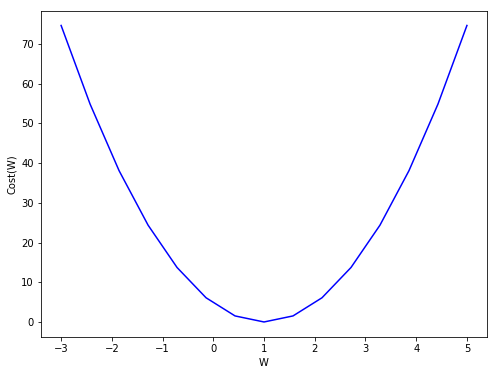

In [32]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= (8,6)

plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

In [40]:
tf.set_random_seed(0)

x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random_normal([1], -100., 100.))

for step in range(3500):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    
    alpha = 0.001
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 | 11716.3086 |  50.872433
   10 | 10669.9326 |  48.593319
   20 |  9717.0088 |  46.418362
   30 |  8849.1904 |  44.342796
   40 |  8058.8794 |  42.362091
   50 |  7339.1470 |  40.471893
   60 |  6683.6953 |  38.668079
   70 |  6086.7778 |  36.946690
   80 |  5543.1733 |  35.303970
   90 |  5048.1167 |  33.736320
  100 |  4597.2720 |  32.240303
  110 |  4186.6934 |  30.812660
  120 |  3812.7825 |  29.450256
  130 |  3472.2664 |  28.150116
  140 |  3162.1609 |  26.909388
  150 |  2879.7502 |  25.725355
  160 |  2622.5613 |  24.595434
  170 |  2388.3425 |  23.517151
  180 |  2175.0408 |  22.488142
  190 |  1980.7894 |  21.506159
  200 |  1803.8867 |  20.569052
  210 |  1642.7828 |  19.674770
  220 |  1496.0675 |  18.821356
  230 |  1362.4546 |  18.006939
  240 |  1240.7749 |  17.229744
  250 |  1129.9623 |  16.488064
  260 |  1029.0468 |  15.780282
  270 |   937.1434 |  15.104840
  280 |   853.4478 |  14.460266
  290 |   777.2271 |  13.845148
  300 |   707.8135 |  13.258140
  310 | 

 2560 |     0.0000 |   1.000315
 2570 |     0.0000 |   1.000300
 2580 |     0.0000 |   1.000287
 2590 |     0.0000 |   1.000273
 2600 |     0.0000 |   1.000261
 2610 |     0.0000 |   1.000249
 2620 |     0.0000 |   1.000238
 2630 |     0.0000 |   1.000227
 2640 |     0.0000 |   1.000216
 2650 |     0.0000 |   1.000207
 2660 |     0.0000 |   1.000197
 2670 |     0.0000 |   1.000188
 2680 |     0.0000 |   1.000180
 2690 |     0.0000 |   1.000171
 2700 |     0.0000 |   1.000163
 2710 |     0.0000 |   1.000156
 2720 |     0.0000 |   1.000149
 2730 |     0.0000 |   1.000142
 2740 |     0.0000 |   1.000136
 2750 |     0.0000 |   1.000130
 2760 |     0.0000 |   1.000124
 2770 |     0.0000 |   1.000118
 2780 |     0.0000 |   1.000112
 2790 |     0.0000 |   1.000108
 2800 |     0.0000 |   1.000103
 2810 |     0.0000 |   1.000098
 2820 |     0.0000 |   1.000093
 2830 |     0.0000 |   1.000089
 2840 |     0.0000 |   1.000085
 2850 |     0.0000 |   1.000082
 2860 |     0.0000 |   1.000078
 2870 | 

In [41]:
print(5.0*W)
print(2.5*W)

tf.Tensor([5.000064], shape=(1,), dtype=float32)
tf.Tensor([2.500032], shape=(1,), dtype=float32)


In [ ]:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━


§ Lec 04 Multivariable linear Regression
 ㅇ multivariate(feature) regression문제: 변수가 다수, 추정값은 하나 
   -> 매트릭스 및 닷프로덕트 사용하여 다수의 피쳐 및 가중치 연산에 사용


In [42]:
x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
y_data  = [1, 2, 3, 4, 5]

# tf.random_uniform 난수 생성

W1 = tf.Variable(tf.random_uniform([1], -10.0, 10.0))
W2 = tf.Variable(tf.random_uniform([1], -10.0, 10.0))
b  = tf.Variable(tf.random_uniform([1], -10.0, 10.0))

learning_rate = tf.Variable(0.001)

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = W1 * x1_data + W2 * x2_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W1_grad, W2_grad, b_grad = tape.gradient(cost, [W1, W2, b])
    W1.assign_sub(learning_rate * W1_grad)
    W2.assign_sub(learning_rate * W2_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(
          i, cost.numpy(), W1.numpy()[0], W2.numpy()[0], b.numpy()[0]))

    0 | 351.808533 |     1.1302 |    -6.0234 |  -6.467658
   50 | 140.418320 |     1.8173 |    -3.1232 |  -5.317189
  100 |  58.373085 |     2.0419 |    -1.2709 |  -4.616140
  150 |  25.359882 |     2.0816 |    -0.0864 |  -4.172924
  200 |  11.781375 |     2.0552 |     0.6709 |  -3.881300
  250 |   6.112636 |     2.0113 |     1.1539 |  -3.680805
  300 |   3.711597 |     1.9677 |     1.4604 |  -3.536181
  350 |   2.671967 |     1.9300 |     1.6531 |  -3.426413
  400 |   2.202548 |     1.8988 |     1.7724 |  -3.338741
  450 |   1.973061 |     1.8731 |     1.8443 |  -3.265294
  500 |   1.845207 |     1.8515 |     1.8856 |  -3.201159
  550 |   1.760961 |     1.8330 |     1.9073 |  -3.143230
  600 |   1.695943 |     1.8166 |     1.9163 |  -3.089536
  650 |   1.639894 |     1.8018 |     1.9171 |  -3.038818
  700 |   1.588473 |     1.7880 |     1.9128 |  -2.990259
  750 |   1.539835 |     1.7750 |     1.9051 |  -2.943333
  800 |   1.493180 |     1.7625 |     1.8954 |  -2.897700
  850 |   1.44

In [53]:
import tensorflow as tf
import numpy as np

tf.enable_eager_execution()
tf.__version__

'1.13.1'

In [68]:
#example - s variables
tf.set_random_seed(0)
x1_data = [1,0,3,0,5]
x2_data = [0, 2, 0, 4, 0]
y_data  = [1, 2, 3, 4, 5]

#tf.random_uniform: 균등분포로부터의 난수값을 반환
#tf.random_uniform(shape -> ex. 2X3 매트릭스, minval, maxval)

W1 = tf.Variable(tf.random_uniform([1], -10.0, 10.0))
W2 = tf.Variable(tf.random_uniform([1], -10.0, 10.0))
b = tf.Variable(tf.random_uniform([1], -10.0, 10.0))

learning_rate = tf.Variable(0.003)

for i in range(7000+1):
    with tf.GradientTape() as tape:
        hypothesis = W1 * x1_data +W2*x2_data +b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W1_grad, W2_grad, b_grad = tape.gradient(cost, [W1, W2, b])
    W1.assign_sub(learning_rate * W1_grad)
    W2.assign_sub(learning_rate * W2_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i% 50 == 0:
         print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(
          i, cost.numpy(), W1.numpy()[0], W2.numpy()[0], b.numpy()[0]))
            #print("출력형식".format(데이터)) 형태로 사용
            #"{n}"안에 숫자를 지정하여 출력 대상 위치 
            #{:길이} : 출력할 데이터의 길이를 지정합니다. 문자열(왼쪽 정렬), 숫자(오른쪽 정렬)
            #{:<길이} : 왼쪽 정렬
            #{:>길이} : 오른쪽 정렬
            #{:^길이} : 가운데 정렬        

    0 | 335.280823 |    -3.8779 |     1.1496 |  -6.004196
   50 |   6.069098 |     1.4523 |     2.0179 |  -4.118774
  100 |   2.520065 |     1.9280 |     2.1199 |  -3.758069
  150 |   2.264699 |     1.9327 |     2.1007 |  -3.568055
  200 |   2.065801 |     1.8948 |     2.0589 |  -3.405035
  250 |   1.884994 |     1.8549 |     2.0135 |  -3.251997
  300 |   1.720040 |     1.8166 |     1.9686 |  -3.106304
  350 |   1.569524 |     1.7800 |     1.9254 |  -2.967244
  400 |   1.432179 |     1.7451 |     1.8840 |  -2.834435
  450 |   1.306852 |     1.7117 |     1.8445 |  -2.707575
  500 |   1.192492 |     1.6799 |     1.8067 |  -2.586396
  550 |   1.088140 |     1.6495 |     1.7706 |  -2.470641
  600 |   0.992919 |     1.6204 |     1.7361 |  -2.360066
  650 |   0.906032 |     1.5926 |     1.7031 |  -2.254441
  700 |   0.826747 |     1.5661 |     1.6717 |  -2.153543
  750 |   0.754400 |     1.5408 |     1.6416 |  -2.057159
  800 |   0.688384 |     1.5166 |     1.6129 |  -1.965090
  850 |   0.62

In [69]:
print(W1 * 1 + W2 * 0 + b)
print(W1 * 4 + W2 * 4 + b)

tf.Tensor([0.99504006], shape=(1,), dtype=float32)
tf.Tensor([8.008743], shape=(1,), dtype=float32)


In [80]:
#2 variables with matrix
x_data = [
    [1., 0., 3., 0., 5.],
    [0., 2., 0., 4., 0.]
]
y_data  = [1, 2, 3, 4, 5]

W= tf.Variable(tf.random_uniform([1,2], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

learning_rate = tf.Variable(0.0003)

for i in range(6000+1):
    with tf.GradientTape() as tape:
            hypothesis = tf.matmul(W, x_data) +b 
            #matmul 행렬곱 함수
            cost= tf.reduce_mean(tf.square(hypothesis - y_data))
            W_grad, b_grad = tape.gradient(cost, [W, b])
            #tape.gradient -> 자동 미분       
            W.assign_sub(learning_rate * W_grad)
            b.assign_sub(learning_rate * b_grad)
    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], b.numpy()[0]))
    

    0 |  36.403778 |    -0.6417 |    -0.3601 |  -0.969585
   50 |  24.086193 |    -0.2867 |    -0.1758 |  -0.818279
  100 |  16.039627 |    -0.0058 |    -0.0171 |  -0.694400
  150 |  10.757798 |     0.2164 |     0.1198 |  -0.592773
  200 |   7.271729 |     0.3919 |     0.2381 |  -0.509225
  250 |   4.956662 |     0.5304 |     0.3405 |  -0.440390
  300 |   3.408673 |     0.6395 |     0.4291 |  -0.383545
  350 |   2.365786 |     0.7255 |     0.5059 |  -0.336490
  400 |   1.657458 |     0.7930 |     0.5726 |  -0.297440
  450 |   1.172190 |     0.8460 |     0.6305 |  -0.264950
  500 |   0.836724 |     0.8874 |     0.6809 |  -0.237846
  550 |   0.602656 |     0.9198 |     0.7247 |  -0.215171
  600 |   0.437805 |     0.9451 |     0.7628 |  -0.196147
  650 |   0.320627 |     0.9646 |     0.7961 |  -0.180140
  700 |   0.236584 |     0.9798 |     0.8250 |  -0.166631
  750 |   0.175786 |     0.9915 |     0.8503 |  -0.155194
  800 |   0.131451 |     1.0004 |     0.8723 |  -0.145481
  850 |   0.09

In [81]:
#변수가 2개인 매트릭스 모델 테스트 
test_data =[
[0.],
[2.]
]
print(tf.matmul(W, test_data + b))

tf.Tensor([[1.9206071]], shape=(1, 1), dtype=float32)


2.0

In [ ]:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━


§ Lec 05 Logistic Regression
 ㅇ 개념
    분류 -> discrete한 데이터 분류는 로지스틱리그레션
    예측 -> continuous한 데이터 예측은 리니어 리그레션 사용
 ㅇ Hypothesis representation
    파라메터 -> linear function -> logistic function -> decision boundary -> 분류값
    과정을 통해 분류값을 구하게되며, 로지스틱 펑션으로 hypothesis representation
    즉, 기존 펑션을 이산값 표현화하고, 디시젼 바운더리 기준으로 binary한 분류 가능하게 해줌

 ㅇ sigmoid
    g(z) = 1/(1+e^(-z))
    -> 로지스틱펑션 입력값 z가 커지면 1에 수렴, Z 작아지면 0에 수렴하여 1,0 으로 분류값 산출
  
 ㅇ Cost function
    - 컨벡스 함수화 필요
    logistic regression에서도 cost function(추정값과 실제값의 차이) 최소화
    추정값의 경우 Sigmoid 등 logistics function 아웃풋을 사용하므로, 
    0과 1사이의 연속적인 값
    실제값의 경우 분류 레이블이므로 0 또는 1의 이산 값 
    -> logistics function 아웃풋과 분류값 차이만을 사용하면 코스트펑션 컨벡스 하지 않음
    
    - 이러한 문제 해결위한 방법으로 log 및 실제 분류값 y와의 곱 활용
      1. 분류값 1 -> 로지스틱 함수값 1이면 코스트펑션 0, 0에 가까울수록 무한대 발산
      2. 분류값 0 -> 로지스틱 함수값 0이면 코스트펑션 0, 1에 가까울수록 무한대 발산
     하는 코스트펑션 구성
        
       

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()
tf.set_random_seed(777)  # for reproducibility
print(tf.__version__)

1.13.1


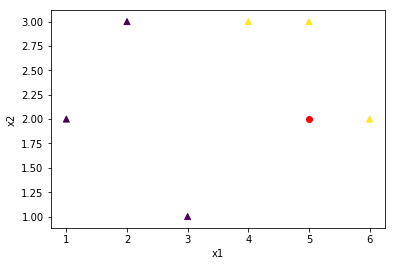

In [44]:
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]


x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [45]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))#.repeat()

In [46]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

In [47]:
def logistic_regression(features):
    hypothesis  = tf.div(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

In [48]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.log(logistic_regression(features)) + (1 - labels) * tf.log(1 - hypothesis))
    return cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [49]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

In [50]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [52]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in tfe.Iterator(dataset):
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000


In [ ]:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━